#Learning Linear Regresison

This example uses linear regression with batch gradient descent to estimate house prices, based on a small training set.   

In general our goal with linear regression is to fit a linear function to our features so that we can learn some function $f(x)$ that can predict a dependent variable based on a set of independent variables, by learning 'weights' .  The general form of the function we're trying to fit is:

$$f(x) = \theta_{0} + \theta_{1}*X_{1} + \theta_{2}*X_{2} + … + \theta_{n}*X_{n}$$

As a concrete example, this demonstration will attempt to predict the dependent variable 'house price' based on the independent variables '# of bedrooms' and 'square feet' by finding some values for $\theta_{0},\theta_{1},$ and $\theta_{2}$ that make the function $f(x) = \theta_{0}+\theta_{1} * 'bedrooms' + \theta_{2} * 'squareFeet'$ as accurate as possible based on some training examples.




## Scaling Data



When solving multivariate linear regression with an iterative method the training data should be scaled (aka normalized, aka standardized) so that all the features are on a similar scale.  Said simply, it helps to have the values of each feature be close in size.   This scaling step is not typically done when solving linear regression directly or with [MLE](http://en.wikipedia.org/wiki/Maximum_likelihood).

In order to scale our data, we'll subtract the feature mean from each value and divide by the feature standard deviation.  This will give our data a mean of 0 and a standard deviation of 1.  The scaleData function below implements this procedure, known as [z-score or standardized score in statistics](http://en.wikipedia.org/wiki/Standard_score).  

$$z = \frac{X - \mu}{\sigma}$$

In [1]:
#z-scores some array
def scaleData(z):
   mu = z.mean(axis=0)
   sigma = z.std(axis=0)
   z = (z - mu)/sigma 
   return z, mu, sigma


In [2]:
import numpy as np

#My sample data set to train our regression with.   
#This is an array with features price, bedrooms, and square footage
#For example a 100,000 dollar house has 2 bedrooms and 1600 square feet.

trainData = np.array([[100000,2,1600],
                     [200000,4,2500],
                     [250000,4,3000],
                     [150000,3,2000]])
#We'll scale the data as noted above.
trainData, mu, sigma = scaleData(trainData)


First we're going to split our array into y, the variable we want to predict (house price)
and X, the array of independent variables we're going to train on.

If you recall from above, our linear equation included a contant $\theta_{0}$ that isn't present in our training data X, so we'll need to add it.   By convention we set $\theta_{0}$ to 1.



In [3]:
y = np.matrix(trainData[:,0]) #slice the first column, house price
y = y.T #we just prefer y to be a column vector instead of a row vector.
X = np.matrix(trainData[:,1:]) #slice the rest of the column into matrix X

#get the number of training samples in X
m = y.size
#Add a column of ones, size m, to X (interception data)
it = np.ones(shape=(m, 1))
X = np.append(it,X,1)


#Cost Function

The purpose of this function is to show us how accurate our $\theta$s are.  Our goal is to minimze this fucntion.  When our model is very accurate (the predicted value is very close to the actual value), J will become very small.   

In a machine learning linear regression model, the cost is typically defined as:
$$J = \frac{1}{2m} \sum_{i=1}^{m}( \hat{y} - y)^2 $$   This is a slightly modified sum of squared error function, where we're scaling the value based on the number of features.   Note that y is the actual value in our training data and $\hat{y}$ is the predicted value of y, based on the current $\theta$s.


In [4]:
#Evaluate the linear regression
def compute_cost(X, y, theta):
    m = y.size
    y_hat = X.dot(theta)
    J = (1.0/2*m)* (y_hat - y).T.dot((y_hat - y))  
    return J

###Note: Math Tricks

Note that while I could have used loops to handle the summation of each row in the training set (i.e. for each row in X, compute the error and add that together), I'm instead using matrix multiplication, to handle the calculation all at once.   This is an important optimization, and one that is used often in ML.  Never loop when you can use linear algebra to vectorize your operations.

For example, if I want to predict the values of X based on my current thetas as above, I can multiple my training data set X, a 4x3 matrix with  $\theta$, a 3x1 vector to result in a 4x1 vector of predicted values.





# Gradient Descent

Now that we have a cost function that can estimate the correctness of our current values of $\theta$, all we have to do is minimize that error rate J by picking the best possible values of $\theta$ we can based on our training data.

To do that, we'll use an optimization algorithm known as 'batch gradient descent.'

On the surface, batch gradient descent is pretty easy:

Repeat Until Converged: {
$$\theta:=\theta-\alpha\frac{\partial}{\partial\theta}J(\theta)$$
}

So, every time we update theta, we will set theta equal to the previous value minus $\alpha$ (a learning rate) multiplied by the partial derivative of the cost function J, with respect to $\theta$

By doing the caluclus, we can get to
$$\frac{\partial}{\partial\theta}J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}( \hat{y} - y)^2 $$

So then:

$$\theta:=\theta-\alpha\frac{\partial}{\partial\theta}J(\theta)$$
Can be expanded to become:
$$\theta := \theta + \alpha \frac{1}{2m} \sum_{i=1}^{m}( y^{i} - \hat{y}^{i} )^2 x^{i}$$
Which is what we've implemented below.   



In [5]:

def gradient_descent(X, y, theta, alpha, num_iters):
   
    m = y.size
    J_history = np.zeros(shape=(num_iters, 1)) # a column vec to hold our previous Js
 
    for i in range(num_iters):
        gradient = (1.0/2*m) * (( y - X.dot(theta)).T.dot(X)).T
        theta =  theta + (alpha * gradient)
        J_history[i, 0] = compute_cost(X, y, theta)
    return theta, J_history

## Finding our $\theta$s

Now that we've implemented these functions, we can pass X (our training data), y (our dependat variable, house price), alpha, and iterations to the gradient_descent function to learn values for $\theta$

We've set $\alpha$ to .01, which is a commonly used good start.  We've set iterations to 1000, which should be more than enough in this case.  A more sophisticated approach would be to repeat until J stops changing significantly (i.e. converges).

In [6]:
alpha = .01
iterations = 1000
#np.shape[1] is the number of features, so we need an equal # of thetas
theta = np.zeros((X.shape[1],1))

theta, J_history = gradient_descent(X,y,theta,alpha, iterations)
print theta


SyntaxError: Missing parentheses in call to 'print' (<ipython-input-6-e9640bb4c240>, line 7)

##Tuning Gradient Descent

We can adjust $\alpha$, the learning rate, and iterations, the number of times gradient descent loops to make gradient descent run better.   Let's try some different values.

In [7]:
from pylab import *
def plot_grad_descent(alpha, iterNum):
    theta = np.zeros((X.shape[1],1))#reinitialize theta
    theta, J_history = gradient_descent(X, y,theta, alpha, iterNum)
    plot(J_history)
    title("alpha = " +str(alpha)+ "; iterations = " +str(iterNum))
    show()


In [8]:
plot_grad_descent(.01,10)

In this graph we can see that $J(\theta)$ is decreasing as iterations increases, which is expected.   While $J(\theta)$ is beginning to stablize, we probably need more iterations before it becomes stable.   Lets try 100.

In [9]:
plot_grad_descent(.01,100)

In this graph we can see $J(\theta)$ has become very small and begins to approach 0 asymptotically as $J(\theta)$ approaches infinity.  Lets further prove that point.

In [ ]:
plot_grad_descent(.01,1000)

Here we can see $J(\theta)$ over 1000 iterations.  

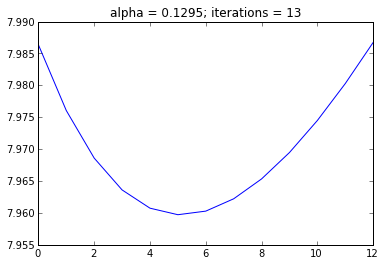

In [66]:
plot_grad_descent(.1295,13)

This last graph is an example of what would happen if we set alpha too large.   In this case gradient descent it taking steps that are too large.   When that happens, $J(\theta)$ will 'miss' the minimum and will begin increasing as iterations increase.

# Making a Prediction

Now that we have some learned weights for our function, we can use them to make a prediction.  In testData we've created three hypothetical houses.  The first house has 2 bedrooms and 2000 square feet.   The second has 3 and 2200, and the last has 5 bedrooms and 4000 square feet.   

We'll need to scale this data and an intercept term, as before in training.   

In [ ]:
alpha = .01
iterations = 100
#np.shape[1] is the number of features, so we need an equal # of thetas
theta = np.zeros((X.shape[1],1))
theta, J_history = gradient_descent(X,y,theta,alpha, iterations)

testData = np.array([[2,2000],
                     [3,2200],
                     [5,4000]])



testData, muTest, sigmaTest = scaleData(testData)


#Add a column of ones to X (intercept term)
m = testData.shape[0]
it = np.ones(shape=(m, 1))
testData = np.append(it,testData,1)
                     

Once we've done that we have testData, a 3x3 matrix,  and $\theta$, a 3x1 column vector.   

In [ ]:
print testData
print theta

If we multiply, we're left with a 3x1 column vector of predicteded house prices.  Lastly, we have to multiple the answer by the standard deviation of house price and add back the mean, to 'unscale' the result.   

In [ ]:
#predicted house prices, unscaled.
print (testData.dot(theta)*sigma[0]+mu[0])


#What's Next?
-Logistic Regression

-L1 / L2 Regularization

-Minibatch and online algorithms